## Import packages and data

In [141]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [142]:
train = pd.read_csv('data/train.csv')
final = pd.read_csv('data/test.csv')

In [143]:
train.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [144]:
train.isna().any()[lambda x: x]

Age         True
Cabin       True
Embarked    True
dtype: bool

## TRAIN - Feature Analysis

### Break out Ticket Code

In [145]:
train['Ticket_Primary'] = None
train['Ticket_Secondary'] = None
train.loc[train['Ticket'].apply(lambda x: ' ' in x), ['Ticket_Primary']] = train.loc[train['Ticket'].apply(lambda x: ' ' in x), 'Ticket'].apply(lambda x: x.split(' ')[0])
train.loc[train['Ticket'].apply(lambda x: ' ' in x), ['Ticket_Secondary']] = train.loc[train['Ticket'].apply(lambda x: ' ' in x), 'Ticket'].apply(lambda x: x.split(' ')[1])

In [146]:
train.loc[train['Ticket'].apply(lambda x: ' ' not in x), ['Ticket_Secondary']] = train.loc[train['Ticket'].apply(lambda x: ' ' not in x), ['Ticket']].values

In [147]:
train.Ticket_Primary.value_counts()

PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
CA             6
STON/O2.       6
SC/PARIS       5
F.C.C.         5
S.O.C.         5
C              5
SC/Paris       4
S.O./P.P.      3
PP             3
A/4            3
SC/AH          3
A/4.           3
P/PP           2
WE/P           2
S.C./PARIS     2
A./5.          2
A.5.           2
SOTON/O2       2
A4.            1
S.W./PP        1
SO/C           1
C.A./SOTON     1
S.P.           1
S.O.P.         1
SCO/W          1
W/C            1
A/S            1
F.C.           1
SW/PP          1
SC             1
Fa             1
W.E.P.         1
S.C./A.4.      1
Name: Ticket_Primary, dtype: int64

### Indicator for Female and Married based on Name

In [148]:
train['Fem_and_Marr'] = False
train.loc[train['Name'].apply(lambda x: '(' in x),'Fem_and_Marr'] = True

### Break out Cabin Code and Number of Cabins

In [149]:
train['Cabin_Primary'] = ''
train.loc[train['Cabin'].apply(lambda x: x == x), 'Cabin_Primary'] = train.loc[train['Cabin'].apply(lambda x: x == x), 'Cabin'].apply(lambda x: x[0]).values

In [150]:
train.Cabin_Primary.value_counts()

     687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Primary, dtype: int64

In [151]:
ohe_cabin = OneHotEncoder()
X = ohe_cabin.fit_transform(train['Cabin_Primary'].values.reshape(-1,1)).toarray()
X = pd.DataFrame(X)
X.columns = ["Cabin" + str(x) for x in X.columns]

In [152]:
ohe_cabin.categories_

[array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)]

In [153]:
train = pd.concat([train.reset_index(drop=True), X.reset_index(drop=True)], axis=1)

In [154]:
train['Multiple_Cabins'] = False
train['Cabin_Count'] = train['Cabin'].apply(lambda x: str(x).count(' ')) + 1
train.loc[train.Cabin.isnull(), 'Cabin_Count'] = 0
train.loc[train['Cabin_Count'].apply(lambda x: x > 1), 'Multiple_Cabins'] = True

In [155]:
train.Cabin_Count.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_Count, dtype: int64

In [156]:
train.loc[train['Multiple_Cabins'] == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin1,Cabin2,Cabin3,Cabin4,Cabin5,Cabin6,Cabin7,Cabin8,Multiple_Cabins,Cabin_Count
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,3
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,2
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,3
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,2
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,2
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,2
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,2
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,2
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,4


### Make Gender and Embarked Variables Numeric

In [157]:
train['Gender_Numeric'] = 0
train.loc[train['Sex'].apply(lambda x: x == 'female'), 'Gender_Numeric'] = 1

In [158]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [159]:
train['Embarked_Q'] = 0
train['Embarked_S'] = 0
train['Embarked_R'] = 0
train.loc[train['Embarked'].apply(lambda x: x == 'S'), 'Embarked_S'] = 1
train.loc[train['Embarked'].apply(lambda x: x == 'Q'), 'Embarked_Q'] = 1
train.loc[train['Embarked'].apply(lambda x: x == 'R'), 'Embarked_R'] = 1
#Filled NA's with zeros

### Fill missing age values with the average

In [160]:
train['Age_Filled'] = train['Age']
train.loc[train['Age'].apply(lambda x: x != x), 'Age_Filled'] = train['Age'].mean()
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin6,Cabin7,Cabin8,Multiple_Cabins,Cabin_Count,Gender_Numeric,Embarked_Q,Embarked_S,Embarked_R,Age_Filled
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0.0,0.0,0.0,False,0,0,1,0,0,29.699118
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,...,0.0,0.0,0.0,False,0,0,0,1,0,29.699118
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,...,0.0,0.0,0.0,False,0,1,0,0,0,29.699118
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,...,0.0,0.0,0.0,False,0,0,0,0,0,29.699118
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,...,0.0,0.0,0.0,False,0,1,1,0,0,29.699118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,...,0.0,0.0,0.0,False,0,0,0,0,0,29.699118
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,...,0.0,0.0,0.0,False,0,1,0,1,0,29.699118
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,...,0.0,0.0,0.0,False,0,0,0,1,0,29.699118
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,...,0.0,0.0,0.0,False,0,0,0,1,0,29.699118


### Fill Missing Values of Fare

In [161]:
train['Fare_Filled'] = train['Fare']
train.loc[train['Fare'].apply(lambda x: x != x), 'Fare_Filled'] = train['Fare'].mean()

### Extract titles and convert to numeric category

In [162]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [163]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [164]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

### Create Family Size Variable and Travelling Alone Indicator

In [165]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

## FINAL - Replicate Feature Analysis

### Break out Ticket Code

In [166]:
final['Ticket_Primary'] = None
final['Ticket_Secondary'] = None
final.loc[final['Ticket'].apply(lambda x: ' ' in x), ['Ticket_Primary']] = final.loc[final['Ticket'].apply(lambda x: ' ' in x), 'Ticket'].apply(lambda x: x.split(' ')[0])
final.loc[final['Ticket'].apply(lambda x: ' ' in x), ['Ticket_Secondary']] = final.loc[final['Ticket'].apply(lambda x: ' ' in x), 'Ticket'].apply(lambda x: x.split(' ')[1])

In [167]:
final.loc[final['Ticket'].apply(lambda x: ' ' not in x), ['Ticket_Secondary']] = final.loc[final['Ticket'].apply(lambda x: ' ' not in x), ['Ticket']].values

In [168]:
final.Ticket_Primary.value_counts()

PC            32
C.A.          19
SOTON/O.Q.     8
SC/PARIS       6
W./C.          5
F.C.C.         4
S.O./P.P.      4
CA             4
CA.            4
A/4            3
A/5.           3
C              3
F.C.           2
SC/AH          2
A/5            2
STON/O         2
S.O.C.         2
SC             1
STON/OQ.       1
AQ/4           1
AQ/3.          1
PP             1
A./5.          1
A.5.           1
SOTON/OQ       1
SC/A.3         1
SOTON/O2       1
S.C./PARIS     1
STON/O2.       1
SC/Paris       1
SC/A4          1
W.E.P.         1
A.             1
LP             1
Name: Ticket_Primary, dtype: int64

### Indicator for Female and Married based on Name

In [169]:
final['Fem_and_Marr'] = False
final.loc[final['Name'].apply(lambda x: '(' in x),'Fem_and_Marr'] = True

### Break out Cabin Code and Number of Cabins

In [170]:
final['Cabin_Primary'] = ''
final.loc[final['Cabin'].apply(lambda x: x == x), 'Cabin_Primary'] = final.loc[final['Cabin'].apply(lambda x: x == x), 'Cabin'].apply(lambda x: x[0]).values

In [171]:
final.Cabin_Primary.value_counts()

     327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_Primary, dtype: int64

In [172]:
ohe_cabin = OneHotEncoder()
X = ohe_cabin.fit_transform(final['Cabin_Primary'].values.reshape(-1,1)).toarray()
X = pd.DataFrame(X)
X.columns = ["Cabin" + str(x) for x in X.columns]

In [173]:
final = pd.concat([final.reset_index(drop=True), X.reset_index(drop=True)], axis=1)

In [174]:
final['Multiple_Cabins'] = False
final['Cabin_Count'] = final['Cabin'].apply(lambda x: str(x).count(' ')) + 1
final.loc[final.Cabin.isnull(), 'Cabin_Count'] = 0
final.loc[final['Cabin_Count'].apply(lambda x: x > 1), 'Multiple_Cabins'] = True

In [175]:
final.Cabin_Count.value_counts()

0    327
1     74
2     10
3      4
4      3
Name: Cabin_Count, dtype: int64

In [176]:
final.loc[train['Multiple_Cabins'] == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin0,Cabin1,Cabin2,Cabin3,Cabin4,Cabin5,Cabin6,Cabin7,Multiple_Cabins,Cabin_Count
27,919,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,1
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
118,1010,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,1
128,1020,2,"Bowenur, Mr. Solomon",male,42.0,0,0,211535,13.0000,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
297,1189,3,"Samaan, Mr. Hanna",male,NaN,2,0,2662,21.6792,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
299,1191,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,1
311,1203,3,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0


### Make Gender and Embarked Variables Numeric

In [177]:
final['Gender_Numeric'] = 0
final.loc[final['Sex'].apply(lambda x: x == 'female'), 'Gender_Numeric'] = 1

In [178]:
final['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [179]:
final['Embarked_Q'] = 0
final['Embarked_S'] = 0
final['Embarked_R'] = 0
final.loc[final['Embarked'].apply(lambda x: x == 'S'), 'Embarked_S'] = 1
final.loc[final['Embarked'].apply(lambda x: x == 'Q'), 'Embarked_Q'] = 1
final.loc[final['Embarked'].apply(lambda x: x == 'R'), 'Embarked_R'] = 1
#Filled NA's with zeros

### Fill missing age values with the average

In [180]:
final['Age_Filled'] = final['Age']
final.loc[final['Age'].apply(lambda x: x != x), 'Age_Filled'] = final['Age'].mean()
final[final.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin5,Cabin6,Cabin7,Multiple_Cabins,Cabin_Count,Gender_Numeric,Embarked_Q,Embarked_S,Embarked_R,Age_Filled
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,...,0.0,0.0,0.0,False,0,0,0,1,0,30.27259
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,...,0.0,0.0,0.0,False,0,1,0,1,0,30.27259
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,...,0.0,0.0,0.0,False,0,0,0,0,0,30.27259
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,...,0.0,0.0,0.0,False,0,1,0,1,0,30.27259
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,...,0.0,0.0,0.0,False,0,1,0,1,0,30.27259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,...,0.0,0.0,0.0,False,0,1,1,0,0,30.27259
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,...,0.0,0.0,0.0,False,0,1,1,0,0,30.27259
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0.0,0.0,0.0,False,0,0,0,1,0,30.27259
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0.0,0.0,0.0,False,0,0,0,1,0,30.27259


In [181]:
final['Fare_Filled'] = final['Fare']
final.loc[final['Fare'].apply(lambda x: x != x), 'Fare_Filled'] = final['Fare'].mean()

### Extract titles and convert to numeric category

In [182]:
final['Title'] = final.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

final['Title'] = final['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

final['Title'] = final['Title'].replace('Mlle', 'Miss')
final['Title'] = final['Title'].replace('Ms', 'Miss')
final['Title'] = final['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
final['Title'] = final['Title'].map(title_mapping)
final['Title'] = final['Title'].fillna(0)

### Create Family Size Variable and Travelling Alone Indicator

In [183]:
final['FamilySize'] = final['SibSp'] + final['Parch'] + 1
final['IsAlone'] = 0
final.loc[final['FamilySize'] == 1, 'IsAlone'] = 1

## Predictive Modeling

### Get Columns

In [184]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_Count,Gender_Numeric,Embarked_Q,Embarked_S,Embarked_R,Age_Filled,Fare_Filled,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,0,0,1,0,22.0,7.25,1,2,0


In [185]:
# Get only columns of interest
pred_cols = ['Pclass', 'SibSp','Parch', 'Fare_Filled','Fem_and_Marr','Cabin_Count','Gender_Numeric',
            'Embarked_S','Embarked_Q','Embarked_R','Age_Filled', 'Cabin0', 'Cabin1', 'Cabin2', 'Cabin3', 'Cabin4', 
             'Cabin5', 'Cabin6', 'Cabin7','Title','FamilySize','IsAlone']
train_out = train.loc[:,pred_cols]
display(train_out)

# Split
X_train, X_test, y_train, y_test = train_test_split(train_out, train['Survived'], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

,Pclass,SibSp,Parch,Fare_Filled,Fem_and_Marr,Cabin_Count,Gender_Numeric,Embarked_S,Embarked_Q,Embarked_R,...,Cabin1,Cabin2,Cabin3,Cabin4,Cabin5,Cabin6,Cabin7,Title,FamilySize,IsAlone
0,3,1,0,7.2500,False,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0
1,1,1,0,71.2833,True,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0
2,3,0,0,7.9250,False,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1
3,1,1,0,53.1000,True,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0
4,3,0,0,8.0500,False,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,False,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1
887,1,0,0,30.0000,False,1,1,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1,1
888,3,1,2,23.4500,False,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4,0
889,1,0,0,30.0000,False,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1


(623, 22) (268, 22) (623,) (268,)


### Train

In [186]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [187]:
mod2 = GradientBoostingClassifier()
mod2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [188]:
mod3 = LogisticRegression()
mod3.fit(X_train, y_train)

C:\Users\kawak\Anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
mod4 = SGDClassifier()
mod4.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Evaluate

In [190]:
print("Random Forest")
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

print("Gradient Boosted")
y_pred2 = mod2.predict(X_test)
print(accuracy_score(y_test, y_pred2))

print("Logistic")
y_pred3 = mod3.predict(X_test)
print(accuracy_score(y_test, y_pred3))

print("SGD")
y_pred4 = mod4.predict(X_test)
print(accuracy_score(y_test, y_pred4))

print("Ensemble")
y_ens = []
for i in range(y_pred.shape[0]):
    y_ens = y_ens + [round((y_pred[i] + y_pred2[i] + y_pred3[i])/3)]
print(accuracy_score(y_test, y_ens))

Random Forest
0.7985074626865671
Gradient Boosted
0.8208955223880597
Logistic
0.8171641791044776
SGD
0.7910447761194029
Ensemble
0.8208955223880597


### Feature Importance

Pclass = 0.0705415527320179
SibSp = 0.03710414665088934
Parch = 0.023960725139269445
Fare_Filled = 0.15887721403467273
Fem_and_Marr = 0.052699482497117416
Cabin_Count = 0.030996690953042732
Gender_Numeric = 0.1520658099684081
Embarked_S = 0.024324445630013115
Embarked_Q = 0.010049760366406098
Embarked_R = 0.0
Age_Filled = 0.135923792524017
Cabin0 = 0.02516997800112536
Cabin1 = 0.003241849370740821
Cabin2 = 0.007935191821314401
Cabin3 = 0.007253278648158582
Cabin4 = 0.007090541799209179
Cabin5 = 0.012007861005871477
Cabin6 = 0.0020359291240605606
Cabin7 = 0.0020416683725701175
Title = 0.17123603626098902
FamilySize = 0.05448693406390687
IsAlone = 0.010957111036199584


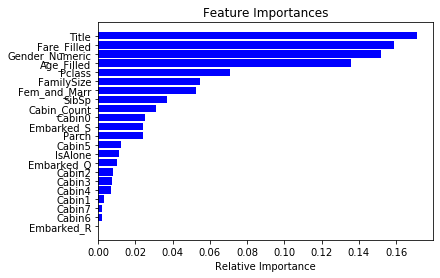

In [191]:
clf.feature_importances_

# Feature Importance
for name, importance in zip(train_out.columns, clf.feature_importances_):
    print(name, "=", importance)
    
features = train_out.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Predict

In [192]:
pred_cols = ['Pclass', 'SibSp','Parch', 'Fare_Filled','Fem_and_Marr','Cabin_Count','Gender_Numeric',
            'Embarked_S','Embarked_Q','Embarked_R','Age_Filled', 'Cabin0', 'Cabin1', 'Cabin2', 'Cabin3', 'Cabin4', 
             'Cabin5', 'Cabin6', 'Cabin7','Title','FamilySize','IsAlone']
final_out = final.loc[:,pred_cols]
final.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_Count,Gender_Numeric,Embarked_Q,Embarked_S,Embarked_R,Age_Filled,Fare_Filled,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,1,0,0,34.5,7.8292,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,1,0,1,0,47.0,7.0000,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,0,62.0,9.6875,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,0,1,0,27.0,8.6625,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,1,0,1,0,22.0,12.2875,3,3,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,0,0,0,1,0,14.0,9.2250,1,1,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,0,1,1,0,0,30.0,7.6292,2,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,0,0,0,1,0,26.0,29.0000,1,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,0,1,0,0,0,18.0,7.2292,3,1,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,0,0,0,1,0,21.0,24.1500,1,3,0


In [193]:
final_out.isna().any()[lambda x: x]

Series([], dtype: bool)

In [194]:
final_preds = clf.predict(final_out)
final_ids = final['PassengerId']
final_submission = pd.DataFrame({'PassengerId': final_ids,
                                'Survived': final_preds})
final_submission.to_csv("submissions/thirddraft.csv", index = False)

In [195]:
print(sum(y_pred), sum(y_test), sum(final_preds))

103 111 150


### Ensembling Methods

In [210]:
final_pred = clf.predict(final_out)
final_pred2 = mod2.predict(final_out)
final_pred3 = mod3.predict(final_out)
final_ens = []
for i in range(final_pred.shape[0]):
    final_ens = final_ens + [int(round((final_pred[i] + final_pred2[i] + final_pred3[i])/3))]

In [211]:
final_ids = final['PassengerId']
final_submission = pd.DataFrame({'PassengerId': final_ids,
                                'Survived': final_ens})
final_submission.to_csv("submissions/3_ens.csv", index = False)

## Predictive Modeling

### Gridsearch

In [ ]:
# Get only columns of interest
pred_cols = ['Pclass', 'SibSp','Parch', 'Fare_Filled','Fem_and_Marr','Cabin_Count','Gender_Numeric',
            'Embarked_S','Embarked_Q','Embarked_R','Age_Filled', 'Cabin0', 'Cabin1', 'Cabin2', 'Cabin3', 'Cabin4', 
             'Cabin5', 'Cabin6', 'Cabin7','Title','FamilySize','IsAlone']
train_out = train.loc[:,pred_cols]
display(train_out)

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(train_out, train['Survived'], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# With grid search
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_grid = grid_search.best_estimator_
best_preds = best_grid.predict(X_test)
accuracy_score(y_test, best_preds)

In [ ]:
# Make Predictions
final = pd.read_csv("data/test.csv")

In [ ]:
# Predict with rf - grid search
final_preds = best_grid.predict(final_out)
final_ids = final['PassengerId']
final_submission = pd.DataFrame({'PassengerId': final_ids,
                                'Survived': final_preds})
final_submission.to_csv("submissions/2_gridsearchrf.csv", index = False)